### Hands-on Practice Lab: Data Wrangling
**Objectives**
- Handle missing data in different ways
- Correct the data type of differeent data values as per requirements
- Standardize and normalize the appropriate data attributes
- Visualize the data as grouped bar graph using Binning
- Converting a categorical data into numerical indicator variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filepath)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [9]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [10]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [13]:
missing_values = df.isnull()
missing_values.head()
for column in missing_values.columns.values.tolist():
    print(missing_values[column].value_counts())
    print("")

Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
False    238
Name: count, dtype: int64

Category
False    238
Name: count, dtype: int64

Screen
False    238
Name: count, dtype: int64

GPU
False    238
Name: count, dtype: int64

OS
False    238
Name: count, dtype: int64

CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
False    238
Name: count, dtype: int64



In [15]:
avg_weight_kg = df['Weight_kg'].mean()
print(avg_weight_kg)

1.8622317596566522


In [17]:
df = df.replace("?", "NaN")

In [19]:
df['Weight_kg'] = df['Weight_kg'].replace(np.nan, avg_weight_kg)

In [29]:
missing_values = df['Weight_kg'].isnull()
missing_values.count()

np.int64(238)

In [32]:
freq_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
freq_screen_size

np.float64(39.62)

In [34]:
df['Screen_Size_cm'] = df['Screen_Size_cm'].replace(np.nan, freq_screen_size)
Count = df['Screen_Size_cm'].isnull()
Count.count()

np.int64(238)

In [36]:
df[['Weight_kg', 'Screen_Size_cm']] = df[['Weight_kg', 'Screen_Size_cm']].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  238 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       238 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [40]:
df['Screen_Size_cm'] = (df['Screen_Size_cm'])/2.5
df['Weight_kg'] = 2.205*(df['Weight_kg'])
df.rename(columns = {'Screen_Size_cm': 'Screen_Size_inch', 'Weight_kg': 'Weight_Pounds'}, inplace=True)

In [41]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_Pounds,Price,Screen_Size_inch,Weight_kg_pounds
0,0,Acer,4,IPS Panel,2,1,5,5.6896,1.6,8,256,7.779240,978,14.224,3.52800
1,1,Dell,3,Full HD,1,1,3,6.3392,2.0,4,256,10.696455,634,15.848,4.85100
2,2,Dell,3,Full HD,1,1,7,6.3392,2.7,8,256,10.696455,946,15.848,4.85100
3,3,Dell,4,IPS Panel,2,1,5,5.4048,1.6,8,128,5.931671,1244,13.512,2.69010
4,4,HP,4,Full HD,2,1,7,6.3392,1.8,8,256,9.286468,837,15.848,4.21155


In [44]:
df["CPU_frequency"] = df["CPU_frequency"]/df["CPU_frequency"].max()
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_Pounds,Price,Screen_Size_inch,Weight_kg_pounds
0,0,Acer,4,IPS Panel,2,1,5,5.6896,0.551724,8,256,7.779240,978,14.224,3.52800
1,1,Dell,3,Full HD,1,1,3,6.3392,0.689655,4,256,10.696455,634,15.848,4.85100
2,2,Dell,3,Full HD,1,1,7,6.3392,0.931034,8,256,10.696455,946,15.848,4.85100
3,3,Dell,4,IPS Panel,2,1,5,5.4048,0.551724,8,128,5.931671,1244,13.512,2.69010
4,4,HP,4,Full HD,2,1,7,6.3392,0.620690,8,256,9.286468,837,15.848,4.21155


In [48]:
Labels = ["Low", "Medium", "High"]
bins = np.linspace(min(df['Price']), max(df['Price']), 4)
df['Price_binned'] = pd.cut(df['Price'], bins, labels=Labels, include_lowest=True)
df.tail()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_Pounds,Price,Screen_Size_inch,Weight_kg_pounds,Price_binned,Price-binned
233,233,Lenovo,4,IPS Panel,2,1,7,5.6896,0.896552,8,256,8.265443,1891,14.224,3.74850,Medium,Medium
234,234,Toshiba,3,Full HD,2,1,5,5.4048,0.827586,8,256,5.834430,1950,13.512,2.64600,Medium,Medium
235,235,Lenovo,4,IPS Panel,2,1,5,4.8768,0.896552,8,256,6.612354,2236,12.192,2.99880,Medium,Medium
236,236,Lenovo,3,Full HD,3,1,5,6.3392,0.862069,6,256,11.668860,883,15.848,5.29200,Low,Low
237,237,Toshiba,3,Full HD,2,1,5,5.6896,0.793103,8,256,9.480949,1499,14.224,4.29975,Low,Low


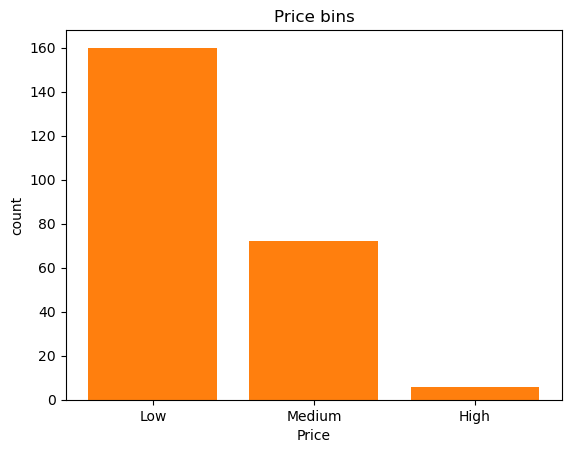

In [51]:
plt.bar(Labels, df['Price-binned'].value_counts())
plt.xlabel('Price')
plt.ylabel('count')
plt.title('Price bins')
plt.show()

# Task - 6

### Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.